In [1]:
using DataFrames, Plots, Binscatters, FixedEffectModels, RegressionTables, StatFiles

In [2]:
#Load data
df_100 = DataFrame(load("work/data/EJ_Dickens_Border_100km.dta"));

In [3]:
# Define the controls and labels for the reg tables.
prod = term(:csi) + term(:csi_change)
geo_controls = term(:malaria) + term(:elev) + term(:elev_sd) + term(:prec) + term(:prec_sd) + term(:temp) + term(:temp_sd)
spatial_controls =  term(:ldist_lang) + term(:ldist_coast) + term(:ldist_border) + term(:ldist_lake) + term(:ldist_rivmaj) + 
                    term(:ldist_rivmin) + term(:ln_langPop) + term(:ln_langArea) + term(:langLat_diff) + term(:langLon_diff)

regLabels = Dict("csi_change_sd" => "Δ in land productivity variation (post-1500)",
				 "csi_sd" => "land productivity variation (pre-1500)",
				 "csi_change" => "Δ in land productivity (post-1500)",
				 "csi" => "land productivity (pre-1500)");

## Table 1

In [4]:
rr1 = reg(df_100, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rr2 = reg(df_100, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rr3 = reg(df_100, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rr4 = reg(df_100, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + spatial_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rr5 = reg(df_100, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls + spatial_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rr6 = reg(df_100[df_100.samecountry .== 1,:], 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls + spatial_controls +
fe(:family1) + fe(:family2) +fe(:ccode1), Vcov.cluster(:langID1,:langID2));

In [5]:
regtable(rr1,rr2,rr3,rr4,rr5,rr6; 
		 renderSettings = asciiOutput(),
		 regressors = ["csi_change_sd","csi_sd","csi_change","csi"],
		 labels = regLabels)


-------------------------------------------------------------------------------------------------------------
                                                                          lingDist                           
                                               --------------------------------------------------------------
                                                     (1)        (2)       (3)        (4)        (5)       (6)
-------------------------------------------------------------------------------------------------------------
Δ in land productivity variation (post-1500)   -0.100***   -0.100**   -0.083*   -0.103**   -0.098**    -0.065
                                                 (0.030)    (0.034)   (0.033)    (0.033)    (0.033)   (0.034)
land productivity variation (pre-1500)          -0.061**   -0.061**    -0.046    -0.043*     -0.040    -0.029
                                                 (0.022)    (0.022)   (0.026)    (0.021)    (0.026)   (0.027)
Δ in land

## Table 2

In [9]:
# Dataset subset with Lang. siblings
df_100_sib = df_100[df_100.sibling .== 1,:]

# Do the regresions
rrr1 = reg(df_100_sib, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rrr2 = reg(df_100_sib, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rrr3 = reg(df_100_sib, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rrr4 = reg(df_100_sib, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + spatial_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rrr5 = reg(df_100_sib, 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls + spatial_controls +
fe(:family1) + fe(:family2), Vcov.cluster(:langID1,:langID2))

rrr6 = reg(df_100_sib[df_100_sib.samecountry .== 1,:], 
term(:lingDist) ~ term(:csi_sd) + term(:csi_change_sd) + 
prod + geo_controls + spatial_controls +
fe(:family1) + fe(:family2) +fe(:ccode1), Vcov.cluster(:langID1,:langID2))

# Output
regtable(rrr1,rrr2,rrr3,rrr4,rrr5,rrr6; 
		 renderSettings = asciiOutput(),
		 regressors = ["csi_change_sd","csi_sd","csi_change","csi"],
		 labels = regLabels) 


------------------------------------------------------------------------------------------------------------------
                                                                             lingDist                             
                                               -------------------------------------------------------------------
                                                     (1)         (2)         (3)         (4)         (5)       (6)
------------------------------------------------------------------------------------------------------------------
Δ in land productivity variation (post-1500)   -0.188***   -0.197***   -0.273***   -0.185***   -0.248***   -0.154*
                                                 (0.043)     (0.048)     (0.061)     (0.048)     (0.061)   (0.071)
land productivity variation (pre-1500)           -0.088*     -0.088*    -0.191**    -0.097**    -0.185**   -0.140*
                                                 (0.035)     (0.035)     (0.060

# Mechanism: Inter-Ethnic Trade

In [11]:
# Load new data for this part
df = DataFrame(load("../data/EJ_Dickens_Group_Homeland.dta"));

## Figure 8

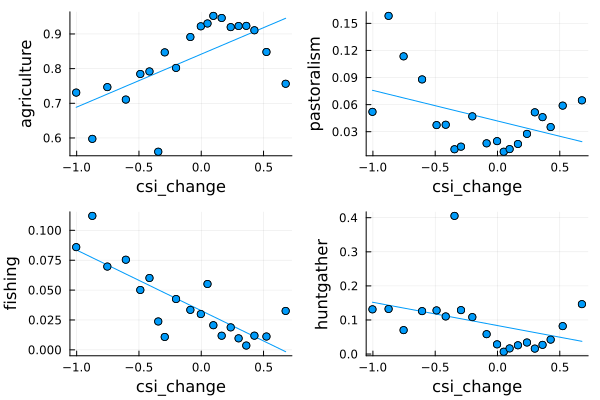

In [12]:
p1 = binscatter(df, @formula(agriculture ~ csi_change + csi), seriestype = :linearfit)
p2 = binscatter(df, @formula(pastoralism ~ csi_change + csi), seriestype = :linearfit)
p3 = binscatter(df, @formula(fishing ~ csi_change + csi), seriestype = :linearfit)
p4 = binscatter(df, @formula(huntgather ~ csi_change + csi), seriestype = :linearfit)
plot(p1, p2, p3, p4, layout=(2,2))

# Table 3

In [13]:
# redifine some controls for this new data
controls = term(:csi_sd) + term(:csi_change_sd) + term(:csi) + term(:csi_change) + 
           term(:elev) + term(:elev_sd) + term(:prec) + term(:prec_sd) + term(:temp) + term(:temp_sd) + 
           term(:ldist_coast) + term(:ldist_border) + term(:ldist_lake) + term(:ldist_rivmaj) + term(:ldist_rivmin) + 
           term(:ln_langPop) + term(:ln_langArea) + term(:langLat) + term(:langLon); 

In [14]:
r1 = reg(df, 
term(:agriculture) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

r2 = reg(df, 
term(:pastoralism) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

r3 = reg(df, 
term(:fishing) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

r4 = reg(df, 
term(:huntgather) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

regtable(r1,r2,r3,r4; 
		 renderSettings = asciiOutput(),
		 regressors = ["csi_change_sd","csi_sd","csi_change","csi"],
		 labels = regLabels) 


------------------------------------------------------------------------------------------------
                                               agriculture   pastoralism    fishing   huntgather
                                               -----------   -----------   --------   ----------
                                                       (1)           (2)        (3)          (4)
------------------------------------------------------------------------------------------------
Δ in land productivity variation (post-1500)        -0.085         0.028     -0.005        0.062
                                                   (0.080)       (0.066)    (0.029)      (0.038)
land productivity variation (pre-1500)              -0.080         0.010      0.004        0.066
                                                   (0.081)       (0.063)    (0.023)      (0.046)
Δ in land productivity (post-1500)                 0.092**        -0.042     -0.027       -0.023
                             

## Figure 9

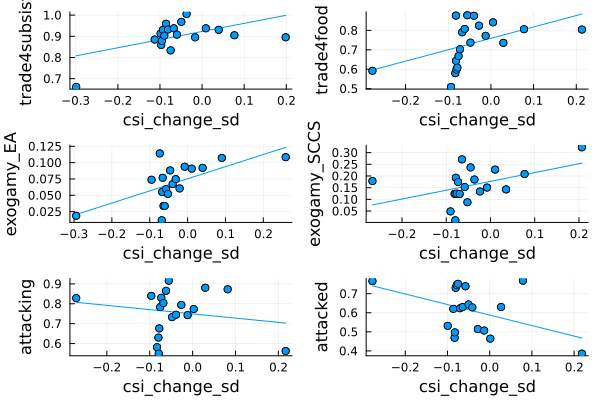

In [15]:
pp1 = binscatter(df, @formula(trade4subsist ~ csi_change_sd + csi_sd), seriestype = :linearfit)
pp2 = binscatter(df, @formula(trade4food ~ csi_change_sd + csi_sd), seriestype = :linearfit)
pp3 = binscatter(df, @formula(exogamy_EA ~ csi_change_sd + csi_sd), seriestype = :linearfit)
pp4 = binscatter(df, @formula(exogamy_SCCS ~ csi_change_sd + csi_sd), seriestype = :linearfit)
pp5 = binscatter(df, @formula(attacking ~ csi_change_sd + csi_sd), seriestype = :linearfit)
pp6 = binscatter(df, @formula(attacked ~ csi_change_sd + csi_sd), seriestype = :linearfit)
plot(pp1, pp2, pp3, pp4, pp5, pp6, layout=(3,2))

# Table 4

In [16]:
reg1 = reg(df, 
term(:trade4subsist) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

reg2 = reg(df, 
term(:trade4food) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

reg3 = reg(df, 
term(:exogamy_EA) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

reg4 = reg(df, 
term(:exogamy_SCCS) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

reg5 = reg(df, 
term(:attacking) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

reg6 = reg(df, 
term(:attacked) ~ controls +
fe(:family) + fe(:ccode), Vcov.cluster(:ccode))

# Output table
regtable(reg1,reg2,reg3,reg4,reg5,reg6; 
		 renderSettings = asciiOutput(),
		 regressors = ["csi_change_sd","csi_sd","csi_change","csi"],
		 labels = regLabels
) 


----------------------------------------------------------------------------------------------------------------------------
                                               trade4subsist   trade4food   exogamy_EA   exogamy_SCCS   attacking   attacked
                                               -------------   ----------   ----------   ------------   ---------   --------
                                                         (1)          (2)          (3)            (4)         (5)        (6)
----------------------------------------------------------------------------------------------------------------------------
Δ in land productivity variation (post-1500)          0.201*       0.316*       0.114*          0.375     -0.502*    -0.578*
                                                     (0.097)      (0.157)      (0.056)        (0.199)     (0.218)    (0.232)
land productivity variation (pre-1500)                 0.139        0.165        0.072          0.260      -0.349    -0.472*